<a href="https://colab.research.google.com/github/drchadvidden/courseMaterials/blob/main/AppliedLinearAlgebra/LabNotebooks/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Applied Problems and Linear Independence

MTH 308: Applied Linear Algebra <br>

Lab parts:

- Part 1: Application, equilibrium pricing, Exercise 1
- Part 2: Linear independence, Exercises 2 and 3



## Instructions

Run each of the coding cells. For example cells, understand the commands and check that the outputs make sense. For exercise cells, write your own code where indicated to generate the correct output.

<u>Submission:</u> Complete the following notebook in order. Once done, print the notebook and save as an HTML file. Upload your submission to the Canvas course page.

<u>Rubric:</u> 15 total points, 3 points to running example cells and saving outputs, 4 points per exercise block with correct output saved.

<u>Deadline:</u> Monday at midnight after the lab is assigned.

#### Example problem

This problem is taken from Example 1 of Section 1.6 of the textbook.
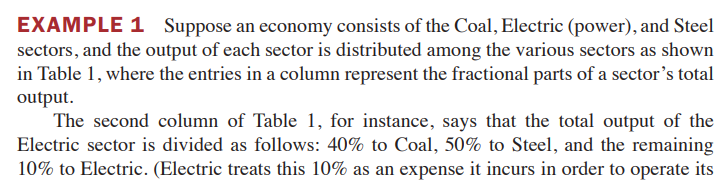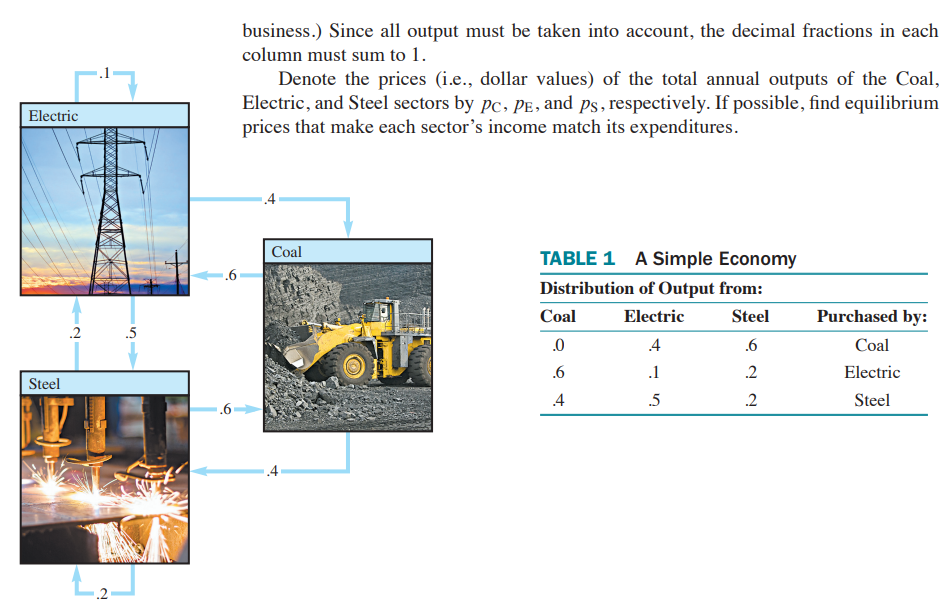


#### Example solution

We seek to have each sector's income match is expenditures. Then, for the Coal sector, we require
$$
p_C = 0.4p_E + 0.6p_S
$$
which we rewrite as
$$
p_C - 0.4p_E - 0.6p_S = 0.
$$
Likewise for the Electric and Steel sectors, we get the following system of equations.
$$
\begin{cases}
p_C - 0.4p_E - 0.6p_S = 0 \\
-0.6p_C + 0.9p_E - 0.2p_S = 0 \\
-0.4p_C - 0.5p_E + 0.8p_S = 0
\end{cases}
$$
This system is solved in the below code.



In [ ]:
# R package install
system('sudo apt install libudunits2-dev')
install.packages("matlib")

In [ ]:
##################
# EXAMPLE CELL
##################

# load a library of matrix operations
library(matlib)

# matrix and right hand side for our linear system
A <- matrix(c(1, -0.4, -0.6,
             -0.6, 0.9, -0.2,
             -0.4,  -0.5, 0.8), nrow=3, ncol=3, byrow=TRUE)
b <- c(0,0,0)

# view the system of lienar equations
print("System of linear equations")
showEqn(A,b)

# reduce to echelon form
echelonA <- echelon(A, b, reduced=FALSE)
print("Echelon form of the system")
print(echelonA)

Note, there is a free variable in the above system. This implies there are infinitely many solutions which makes sense since we are working with percents and don't know the income / expense size of these sectors. To resolve this, let's assume the Steel sector has income of 50 million dollars. That is,
$$
p_S = 50.
$$
where the units are in millions. Let's update the system with this new equation.

In [ ]:
##################
# EXAMPLE CELL
##################

# load a library of matrix operations
library(matlib)

# matrix and right hand side for our linear system
A <- matrix(c(1, -0.4, -0.6,
             -0.6, 0.9, -0.2,
             -0.4,  -0.5, 0.8,
             0,0,1), nrow=4, ncol=3, byrow=TRUE)
b <- c(0,0,0,50)

# view the system of lienar equations
print("System of linear equations")
showEqn(A,b)

# reduce to echelon form
echelonA <- echelon(A, b, reduced=FALSE)
print("Echelon form of the system")
print(echelonA)

# solve the linear system
x <- Solve(A,b)

Finally we have solutions
$$
p_C \approx 46.97, \quad p_E \approx 42.42, \quad p_S = 50.
$$
That is, the Coal sector has revenue of \$46,970,000, the Electric sector has revenue of \$42,420,000, and the Steel sector has revenue of \$50,000,000.

#### Exercise 1

Using the approach of the above example, solve Exercise 4 of Section 1.6 of the text as below.

<img src="attachment:capture4.png" width=75%/>

#### Exercise 1 setup (GIVE YOUR OWN EXPLANATION HERE)

Use this markdown block to formulate your linear system.

In [ ]:
##################
# EXERCISE CELL
##################

# use this exercise cell to show this problem has many solutions

##########################
# beginning of your code


# end of your code
##########################

In [ ]:
##################
# EXERCISE CELL
##################

# assuming the Transportation sector has a budget of 3 million dollars, find the unique solution to this linear system

##########################
# beginning of your code


# end of your code
##########################

#### Exercise 1 solution interpretation (GIVE YOUR OWN EXPLANATION HERE)

Use this markdown block to interpret the solution found with the above code.

## Part 2: Linear independence

Here we explore linear independence by:
- Testing whether a set of vectors is linearly independent or linearly dependent
- Rewriting a vector as a linear combination of a set of linearly independent vectors

### Example

Here we will test if the columns of the below matrix are linearly independent.
$$
A = \left[
\begin{array}{ccc}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{array}
\right]
$$

In [ ]:
##################
# EXAMPLE CELL
##################

# load a library of matrix operations
library(matlib)

# matrix and right hand side for our linear system
A <- matrix(c(1, 2, 3,
             4, 5, 6,
             7, 8, 9), nrow=3, ncol=3, byrow=TRUE)

echA <- echelon(A, reduced=TRUE)
print("Check reduced row echelon form of A")
print(echA)
print("Count the number of pivots of A by summing the diagonal.")
print(sum(diag(echA)))
print("Looks like the columns of A are not linearly independent since there is not a full set of pivots.")
print("Can write the 3rd column of A as a linear combination of the previous 2")
weights <- echA[,3]
print(A[,3])
print(weights[1]*A[,1]+weights[2]*A[,2])

#### Exercise 2

Use the below code block to create your own function which checks if the columns of a matrix are linearly independent or linearly dependent. Test your function on the following matrices.
$$
A = \left[
\begin{array}{ccc}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 0
\end{array}
\right], \quad B = \left[
\begin{array}{ccc}
1 & 2 & 0 \\
4 & 5 & 0 \\
7 & 8 & 0
\end{array}
\right], \quad C = \left[
\begin{array}{ccc}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{array}
\right], \quad D = \left[
\begin{array}{cc}
1 & 2  \\
4 & 5  \\
7 & 8
\end{array}
\right]
, \quad E = \left[
\begin{array}{ccccc}
8 & -3 & 0 & -7 & 2 \\
-9 & 4 & 5 & 11 & -7 \\
6 & -2 & 2 & -4 & 4 \\
5 & -1 & 7 & 0 & 10
\end{array}
\right]
$$



In [ ]:
##################
# EXERCISE CELL
##################

# create a function here which inputs a matrix A and returns a 0 (or "lin dep") if the columns of the matrix are linearly dependent and a 1 (or "lin indep") if the columns are linearly independent
# HINT: You should use the echelon() function as in the examples in Part 1. To sum the row of a matrix, use the sum() command.

##########################
# beginning of your code


# end of your code
##########################


# test the above function on the five matrices provided above

##########################
# beginning of your code


# end of your code
##########################


#### Exercise 3

For matrix $E$ above, you should have found that the columns of matrix $E$ are linearly dependent. Use the following code block to

- Write the 1st column of $E$ as linear combination of the rest.
- Write the 5th column of $E$ as linear combination of the rest.
- BONUS: Find the largest set of linearly independent columns of $E$.



In [ ]:
##################
# EXERCISE CELL
##################

##########################
# beginning of your code

# end of your code
##########################

## Bonus: Solve exercise 14 in Section 1.6 of the text.